In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Exercise 1 Mystery3 algorithm
def mystery3(a,b,eps):
    p=max(a,b)
    q=min(a,b)
    while (q>=eps):
        r=(q/p)**2
        s=r/(r+4)
        p=(2*s+1)*p
        q=s*p
    return p

In [3]:
eps=10**-100
n=100
for i in range(1,10):
    print(i,":",mystery3(i,n,eps))
    
print(mystery3(mystery3(1,10,eps),mystery3(1,10,eps),eps))


1 : 100.00499990625315
2 : 100.01999850019997
3 : 100.04499240852721
4 : 100.07997601279081
5 : 100.12494145502335
6 : 100.17987864556457
7 : 100.24477527309556
8 : 100.31961681685125
9 : 100.40438656098117
14.349183731552877


In [4]:
#Distances types of computation
def euclidean_distance(A,B):
    return np.sum(np.sqrt(np.sum((B-A)**2,axis=1)),axis=0)

def manhattan_distance(A,B):
    return np.sum(np.sum(np.abs(B-A),axis=1),axis=0)

def chebyshev_distance(A,B):
    return  np.max(np.sum(np.abs(B-A),axis=1),axis=0)

def get_distance(A,B,method="E"):
    if method.upper()=="E":
        return euclidean_distance(A,B)
    elif method.upper() == "M":
        return manhattan_distance(A,B)
    elif method.upper() == "C":
        return chebyshev_distance(A,B)
    
#Getting center of all the friends points
def find_center(Points,inGridPosition=False):
    center=np.sum(Points,axis=0)/len(Points)
    if inGridPosition == False:
        return center
    else:
        return np.round(center)

#Calculating the best location based on a given point or on computed central point
def best_location(Points,inGridPosition=False,method="E",dec_place_accuracy=3,max_loop=10**6,reference_point=[]):
    neighbours=[]
    
    if method.upper() == "E":
        center=find_center(Points,inGridPosition)
    else:
        dec_place_accuracy=0
        inGridPosition=True
        
    if inGridPosition == True:
        dec_place_accuracy=0
    
    if len(reference_point)==0:
        center=find_center(Points,inGridPosition)
    else:
        center=reference_point.copy()
    
    #print('reference_point',reference_point)
    #print('dec_place_accuracy',dec_place_accuracy)
    #print('inGridPosition',inGridPosition)
    #print('center',center)
    
    #upper position
    neighbours.append(center.copy())
    neighbours[-1][1]+=10**-dec_place_accuracy
    
    #upper left position
    neighbours.append(center.copy())
    neighbours[-1][0]-=10**-dec_place_accuracy
    neighbours[-1][1]+=10**-dec_place_accuracy
    
    #left position
    neighbours.append(center.copy())
    neighbours[-1][0]+=10**-dec_place_accuracy
    
    #bottom left position
    neighbours.append(center.copy())
    neighbours[-1][0]-=10**-dec_place_accuracy
    neighbours[-1][1]-=10**-dec_place_accuracy
    
    #upper right position
    neighbours.append(center.copy())
    neighbours[-1][0]+=10**-dec_place_accuracy
    neighbours[-1][1]+=10**-dec_place_accuracy
    
    #right position
    neighbours.append(center.copy())
    neighbours[-1][0]+=10**-dec_place_accuracy
    
    #bottom right position
    neighbours.append(center.copy())
    neighbours[-1][0]+=10**-dec_place_accuracy
    neighbours[-1][1]-=10**-dec_place_accuracy
    
    #bottom position
    neighbours.append(center.copy())
    neighbours[-1][1]-=10**-dec_place_accuracy
    
    #print("\n==========\n ",neighbours,"\n==========\n")
    
    new_pt=center.copy()
    for ngb in neighbours:
        dist_point=get_distance(new_pt,Points,method)
        if dist_point - get_distance(ngb,Points,method)>0 and ngb[0]>=0 and ngb[1]>=0:
            #print(ngb,dist_point,get_distance(ngb,Points,method))
            new_pt=ngb.copy()
    #print(new_pt,":",center)
    
    stepDirectionX=new_pt[0]-center[0]
    stepDirectionY=new_pt[1]-center[1]
    #print('stepDirectionX ',stepDirectionX)
    #print('stepDirectionY ',stepDirectionY)
    
    #moving to the nearest direction giving the shortest distance until the best location is found or the loop is stopped
    itr=0
    while itr < max_loop:
        dist_point=get_distance(Points,new_pt,method)
        #print(new_pt,'-',dist_point) 
        new_pt[0]+=stepDirectionX
        new_pt[1]+=stepDirectionY 
        dist_new_pt=get_distance(Points,new_pt,method)
        #print(new_pt,'-',dist_new_pt )
        if dist_new_pt - dist_point > 0 or new_pt[0]+stepDirectionX<0 or new_pt[1]+stepDirectionY<0:
            break  
        itr+=1
    return new_pt

#plotting function
def plotting(Points,center):
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot()
    for i,j in Points:
        ax.scatter(i,j,color='blue',marker='o',alpha=0.8)
    ax.scatter(center[0],center[1],color='red',marker="x")
    ax.annotate('M',(center[0],center[1]))
    ax.grid()

List of friends' location: [array([0, 0]), array([2000,    0]), array([1000, 2000])]
Suitable best location M for the meeting: [1000.          577.34966667]
Distance of M with other places: 3732.050807569113


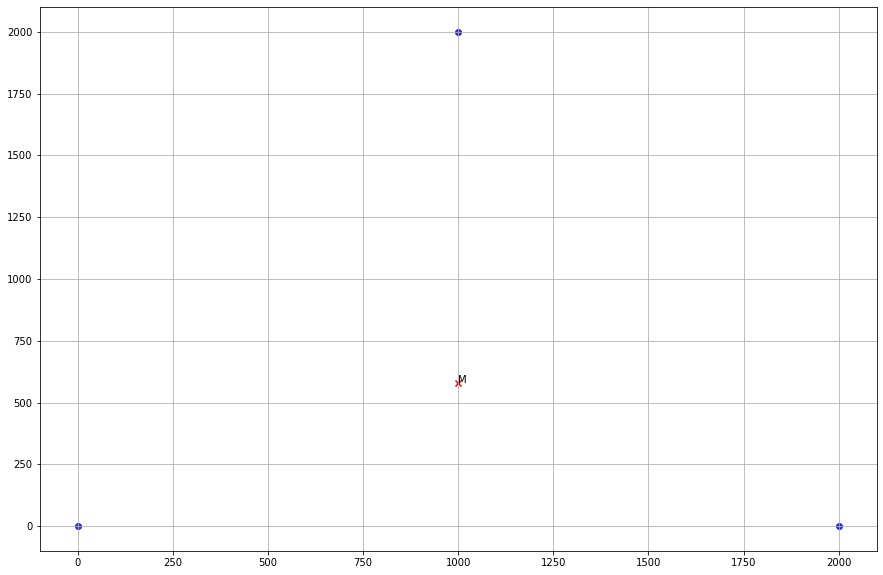

In [5]:
#Exercise 2.1 Friends continuous version
Points=[]
A=np.array([0,0])
B=np.array([2000,0])
E=np.array([1000,2000])
Points.append(A)
Points.append(B)
Points.append(E)

decimal_place_accuracy=3
max_loop=10**6
center=best_location(Points,False,"E",decimal_place_accuracy,max_loop)
#center=best_location(Points,False,"E")
print("List of friends' location:",Points)
print("Suitable best location M for the meeting:",center)
print("Distance of M with other places:",get_distance(Points,center,"E"))
plotting(Points,center)

List of friends' location: [array([2, 3]), array([1990,    0]), array([1001, 1999])]
Suitable best location M for the meeting: [1045.76466667  619.23533333]
Distance of M with other places: 3721.7658832772913


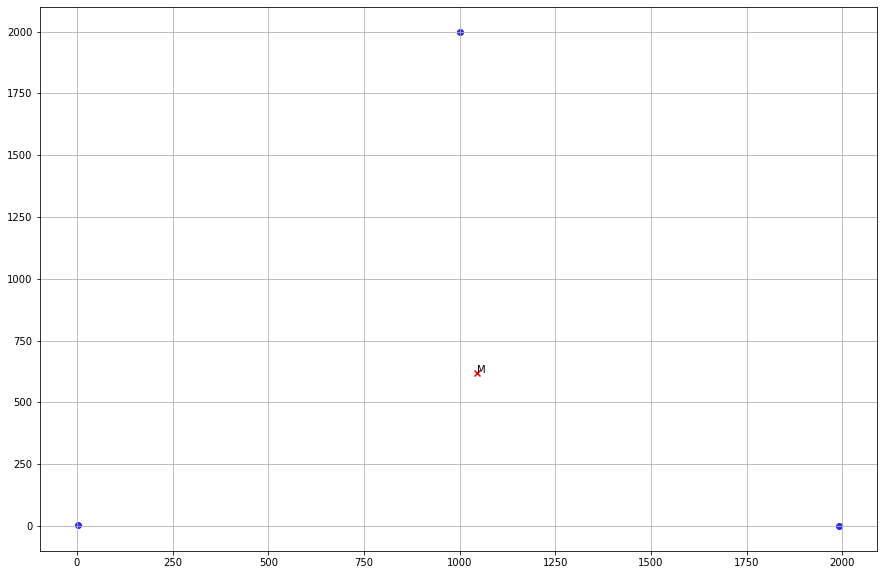

In [6]:
#Exercise 2.1.1
Points=[]
A=np.array([2,3])
B=np.array([1990,0])
E=np.array([1001,1999])
Points.append(A)
Points.append(B)
Points.append(E)

decimal_place_accuracy=3
max_loop=10**6
#center=best_location(Points,False,"E",dec_place_accuracy,max_loop)
center=best_location(Points,False,"E")
print("List of friends' location:",Points)
print("Suitable best location M for the meeting:",center)
print("Distance of M with other places:",get_distance(Points,center,"E"))
plotting(Points,center)

List of friends' location: [array([0, 0]), array([2000,    0]), array([1000, 2000])]
Suitable best location M for the meeting: [1000.    0.]
Distance of M with other places: 4000.0


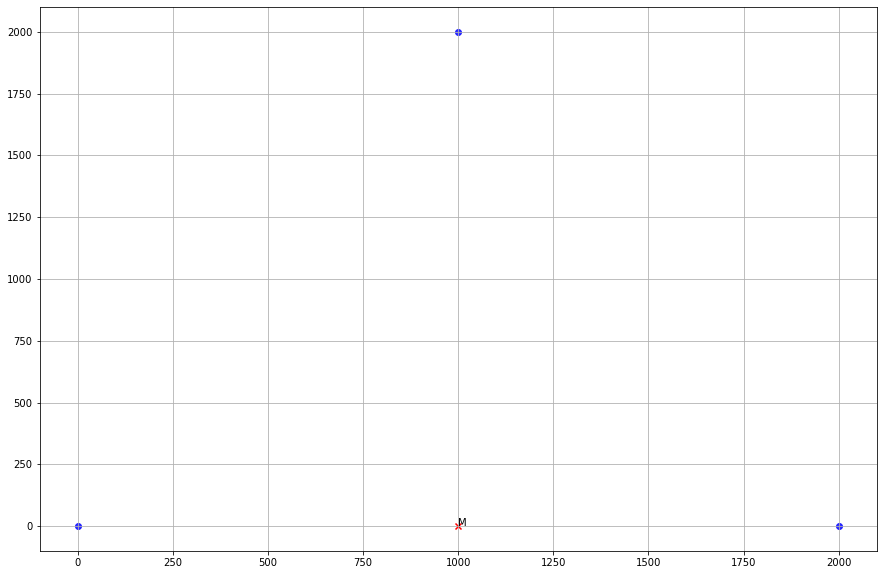

In [7]:
#Exercise 2.2 Friends discrete version Ex 1
Points=[]
A=np.array([0,0])
B=np.array([2000,0])
E=np.array([1000,2000])
Points.append(A)
Points.append(B)
Points.append(E)

decimal_place_accuracy=3
max_loop=10**6
center=best_location(Points,False,"M",decimal_place_accuracy,max_loop)
#center=best_location(Points,False,"E")
print("List of friends' location:",Points)
print("Suitable best location M for the meeting:",center)
print("Distance of M with other places:",get_distance(Points,center,"E"))
plotting(Points,center)

List of friends' location: [array([2, 3]), array([1990,    0]), array([1001, 1999])]
Suitable best location M for the meeting: [1004.    4.]
Distance of M with other places: 3983.0108681965758


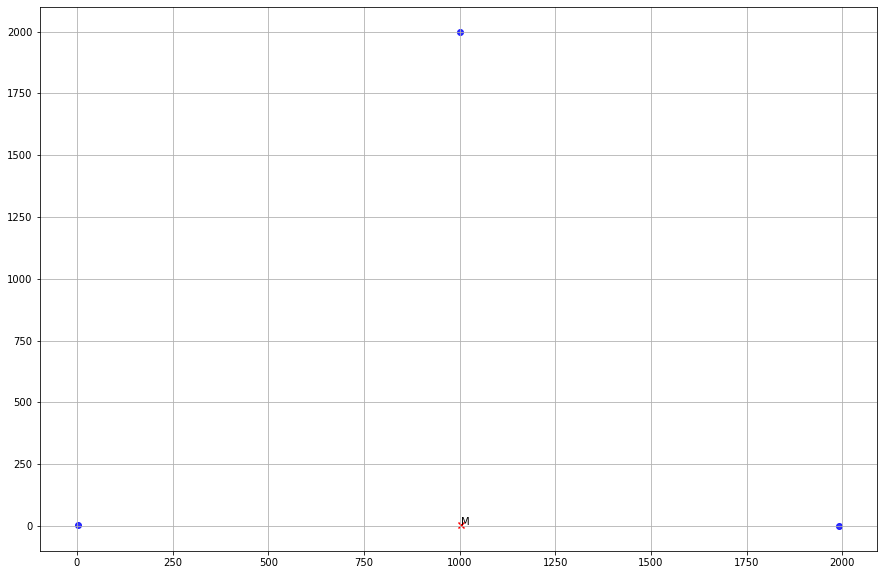

In [8]:
#Exercise 2.2 Friends discrete version Ex 2
#Points=[]
#A=np.array([2,3])
#B=np.array([1990,0])
#E=np.array([1001,1999])
#Points.append(A)
#Points.append(B)
#Points.append(E)
Points[0]=np.array([2,3])
Points[1]=np.array([1990,0])
Points[2]=np.array([1001,1999])

decimal_place_accuracy=0
max_loop=10**6
center=best_location(Points,True,"M",decimal_place_accuracy,max_loop,center)
#center=best_location(Points,False,"E")
print("List of friends' location:",Points)
print("Suitable best location M for the meeting:",center)
print("Distance of M with other places:",get_distance(Points,center,"E"))
plotting(Points,center)

List of friends' location: [array([2, 3]), array([1990,    0]), array([1001, 1999]), array([1001, 1999]), array([1999,    1])]
Suitable best location M for the meeting: [1000.    0.]
Distance of M with other places: 6985.005509758319


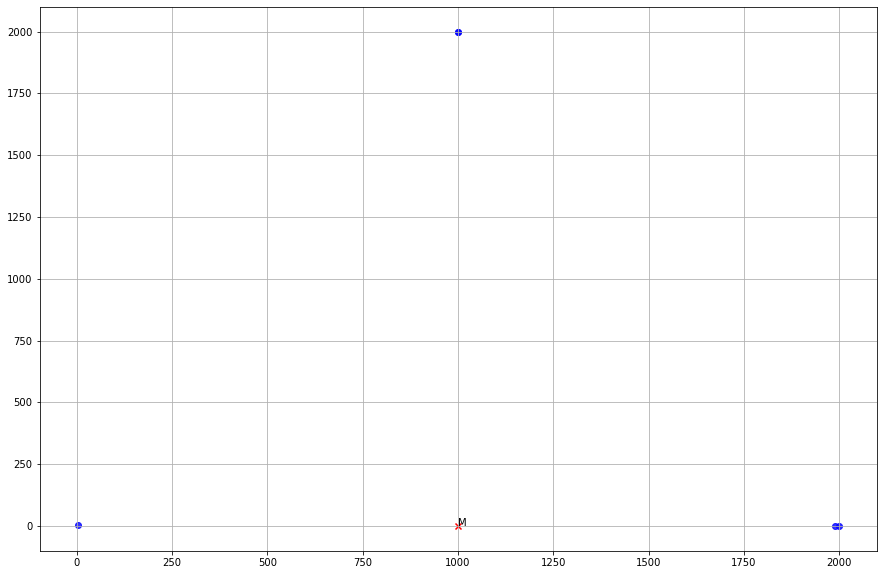

In [9]:
#Exercise 2.2 Friends discrete version Ex 3
C=np.array([1001,1999])
D=np.array([1999,1])
Points.append(C)
Points.append(D)

decimal_place_accuracy=0
max_loop=10**6
center=best_location(Points,True,"M",decimal_place_accuracy,max_loop,center)
#center=best_location(Points,False,"E")
print("List of friends' location:",Points)
print("Suitable best location M for the meeting:",center)
print("Distance of M with other places:",get_distance(Points,center,"E"))
plotting(Points,center)